# Expolratory Data Analysis and Hypothesis Testing of Movie Data

This Jupyter notebook consists of analysis and hypothesis testing of the given set of data "movie_metadata.csv"(data obtained from IMDB Website),to develop an action plan to generate maximum profit for the upcoming movie project of SussexBudgetProductions.Based on the analysis performed,I will be suggesting the genre of movies that gives a maximum profit within a budget of 1.5 million.(Consider the money 1.5 million as well as all the money to be GBP) 

In [34]:
#import all the libraries.

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import scipy.stats as stats


In [35]:
#read the CSV data
myfile = 'movie_metadata.csv'
df= pd.read_csv(myfile,index_col=None)

In [36]:
#printing the dataframe generated.
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [39]:
#checking duplicates and if there are duplicates then remove them.
count_dup = df.duplicated().sum()
if(count_dup>0):
    df.drop_duplicates(subset=None, keep="first", inplace=True)
else:
    print("no duplicates")

no duplicates


In [40]:
#Find null vales
df.isnull().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

During the process of removimg nulls,I did try to replace the null value with the mean of the respective fields.However since gross is very sensitive and a huge diffrence is refelected in the eda process,I have decided to drop the rows with null values.

In [41]:
#drop the null values from gross
df=df.dropna(axis='index',how='any',subset=['budget','gross'])

In [42]:
df.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
aspect_ratio                 74
movie_facebook_likes          0
dtype: int64

We create a new column called 'profit' and we will be doing our analysis based on this column.

In [43]:
#creating a new column profit for df ie, profit=gross-budget
df.insert(6,column='profit',value=df['gross']-df['budget'])

In [44]:
#list out all the columns of df
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'profit',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster',
       'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

In [45]:
#remove all the non essenetial columns for the analysis
df=df.drop(columns=['movie_facebook_likes','color','aspect_ratio','actor_3_name','actor_3_facebook_likes','cast_total_facebook_likes','duration','content_rating','facenumber_in_poster','movie_imdb_link','plot_keywords','director_name','director_facebook_likes','actor_1_name','actor_2_name','actor_1_facebook_likes','actor_2_facebook_likes','country','num_critic_for_reviews','num_user_for_reviews','num_voted_users'],axis=1)

In [46]:
#converting budget and profit units to millions
df['budget']=df['budget']/1000000
df['profit']=df['profit']/1000000
df['gross']=df['gross']/1000000

In [47]:
df.isnull().sum() #check for null values,if no null we wre good to go

profit         0
gross          0
genres         0
movie_title    0
language       3
budget         0
title_year     0
imdb_score     0
dtype: int64

In [48]:
df.describe()

,profit,gross,budget,title_year,imdb_score
count,3857.000000,3857.000000,3857.000000,3857.000000,3857.000000
mean,5.710748,50.912638,45.201891,2003.068188,6.463806
std,227.030711,69.303773,223.309557,10.005510,1.053697
min,-12213.298588,0.000162,0.000218,1920.000000,1.600000
25%,-10.221401,6.754898,10.000000,1999.000000,5.900000
50%,0.834712,27.829874,24.000000,2005.000000,6.600000
75%,24.651794,65.452312,50.000000,2010.000000,7.200000
max,523.505847,760.505847,12215.500000,2016.000000,9.300000


In [49]:
#group the movies based on the Language and comput the mean

df.groupby('language')['budget','profit','imdb_score'].mean().sort_values('profit',ascending=False)

/var/folders/2q/sd7f2k9907v40m2yqkx27y4h0000gn/T/ipykernel_1964/1748463778.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('language')['budget','profit','imdb_score'].mean().sort_values('profit',ascending=False)


,budget,profit,imdb_score
language,,,
English,38.943377,14.211134,6.424034
Maya,40.000000,10.859889,7.800000
Persian,0.230000,2.669225,8.133333
Indonesian,1.050000,1.244672,7.900000
Romanian,0.590000,0.595783,7.900000
Zulu,3.000000,-0.087637,7.300000
Arabic,1.300000,-0.239409,7.200000
Hebrew,1.150000,-0.325534,7.500000
Portuguese,3.640000,-0.927426,7.760000


From the above code it is visible that the English Movies obtained the maximum profit.Now let us move forward with movies associated with English language.

In [50]:
df[df['language']=='English'].shape

(3674, 8)

There are 3674 English movies.During our Analysis,let us not consider the IMDB rating as some movies produced high profit even though they had low IMDB rating.

In [51]:
#filter out all the movies in English Language.
df=df[(df.language =='English') ] #& (df.imdb_score>imdb_cutoff)]

In [52]:
df=df[['genres','movie_title','language','imdb_score','budget','gross','profit','title_year']]

In [53]:
df

,genres,movie_title,language,imdb_score,budget,gross,profit,title_year
0,Action|Adventure|Fantasy|Sci-Fi,Avatar,English,7.9,237.0000,760.505847,523.505847,2009.0
1,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,English,7.1,300.0000,309.404152,9.404152,2007.0
2,Action|Adventure|Thriller,Spectre,English,6.8,245.0000,200.074175,-44.925825,2015.0
3,Action|Thriller,The Dark Knight Rises,English,8.5,250.0000,448.130642,198.130642,2012.0
5,Action|Adventure|Sci-Fi,John Carter,English,6.6,263.7000,73.058679,-190.641321,2012.0
...,...,...,...,...,...,...,...,...
5025,Comedy|Crime|Horror,Pink Flamingos,English,6.1,0.0100,0.180483,0.170483,1972.0
5033,Drama|Sci-Fi|Thriller,Primer,English,7.0,0.0070,0.424760,0.417760,2004.0
5034,Thriller,Cavite,English,6.3,0.0070,0.070071,0.063071,2005.0
5037,Comedy|Drama,Newlyweds,English,6.4,0.0090,0.004584,-0.004416,2011.0


Let us now continue our analysis on the updated dataframe df.In the beginning ,it is mentioned that we have a budget of 1.5 million.Hence let us stick to our budget

In [54]:
#filter out all the movies budget <= 1.5 million GBP
data=df[df['budget']<=1.5]

As we are planning for a movie within year 2022(or after 2022),It is very important to have movies that fit the audience.It is also important to consider different age group.Hence i have choosen all the movies from 1997.

In [55]:
#filter all the movies after yaer 1997
data=data[data['title_year'] > 1997]

In [56]:
data

,genres,movie_title,language,imdb_score,budget,gross,profit,title_year
3941,Comedy|Horror|Mystery,Psycho Beach Party,English,6.3,1.5000,0.265107,-1.234893,2000.0
3950,Drama|Horror|Sci-Fi,Stake Land,English,6.5,0.6500,0.018469,-0.631531,2010.0
4147,Comedy|Romance,Boynton Beach Club,English,6.5,1.5000,3.123749,1.623749,2005.0
4216,Crime|Drama,This Is England,English,7.7,1.5000,0.327919,-1.172081,2006.0
4268,Drama,Thirteen,English,6.8,1.5000,4.599680,3.099680,2003.0
...,...,...,...,...,...,...,...,...
5023,Romance,Breaking Upwards,English,6.2,0.0150,0.076382,0.061382,2009.0
5033,Drama|Sci-Fi|Thriller,Primer,English,7.0,0.0070,0.424760,0.417760,2004.0
5034,Thriller,Cavite,English,6.3,0.0070,0.070071,0.063071,2005.0
5037,Comedy|Drama,Newlyweds,English,6.4,0.0090,0.004584,-0.004416,2011.0


Finally,we are at the end of data cleaning phase.The final dataframe "data" contain all the "English" Movies within a budget of "1.5 million" and released after 1997.

# Exploratory Data Analysis (dataframe: data)

In [57]:
data.describe()

,imdb_score,budget,gross,profit,title_year
count,185.000000,185.000000,185.000000,185.000000,185.000000
mean,6.518378,0.695059,4.518041,3.822983,2005.989189
std,0.894055,0.469237,15.458402,15.493266,4.900077
min,3.300000,0.000218,0.000703,-1.499297,1998.000000
25%,6.100000,0.250000,0.056129,-0.672499,2002.000000
50%,6.600000,0.650000,0.287761,-0.039916,2006.000000
75%,7.200000,1.000000,2.073984,1.273984,2011.000000
max,8.400000,1.500000,140.530114,140.470114,2015.000000


In [58]:
#length of the dataframe data calculated for info purpose
len(data)

185

It is time to find answer to which genre will be able to attain maximum profit.In order to obtain our objective let us group the movies based genres and compute the average of profit for each genre.

In [59]:
#create a new dataframe top_genre and group the movies based on genres and compute the mean.
top_genre=data.groupby('genres')[['profit']].mean()

In [60]:
#select the first 10 genres with maximum profit
popular_10_genre=top_genre.sort_values('profit',ascending=False)[:10]
popular_10_genre=popular_10_genre.reset_index() #resetting the index

Plotting the bar graph for the same popular_20_genre will give us the complete picture and help us to identify the genres that made the highest profit.This visualisation aid give us a clear picture of of movie genres with the profits they made.

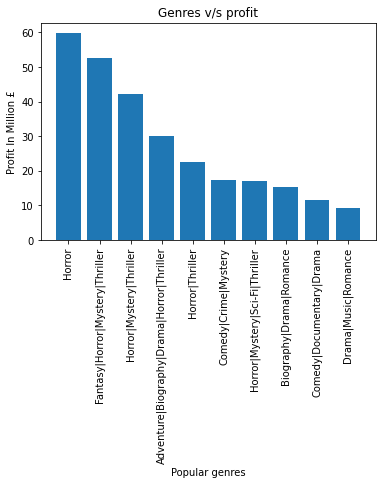

In [61]:
plt.bar(popular_10_genre['genres'],popular_10_genre['profit'])
plt.xticks(rotation = 90)
plt.xlabel('Popular genres')
plt.ylabel('Profit In Million £')
plt.title('Genres v/s profit')
plt.show()

Hence, let us come to the conclusion that movies associated with genres of "Horror|Mystery|Thriller" have the upper hand.Now let us consider the top 20 movies with highest profit from our dataframe "data".

In [62]:
#top 20 highest grossed movies.
data.nlargest(20,'profit')[['movie_title','genres','budget','profit',]].set_index('movie_title')

,genres,budget,profit
movie_title,,,
The Blair Witch Project,Horror,0.060,140.470114
Paranormal Activity,Horror,0.015,107.902283
Saw,Horror|Mystery|Thriller,1.200,53.953403
Insidious,Fantasy|Horror|Mystery|Thriller,1.500,52.491137
The Devil Inside,Horror,1.000,52.245055
Napoleon Dynamite,Comedy,0.400,44.140956
Fireproof,Drama|Romance,0.500,32.951479
Unfriended,Horror|Mystery|Thriller,1.000,30.537320
Open Water,Adventure|Biography|Drama|Horror|Thriller,0.500,30.000882


By looking at the above generated list of top 20 highest grossed movies within 1.5 million budget,we can certainly conclude that the Horror is a predominant factor. 

Let us now consider all the horror movies by creating a dataframe "horror_data" from "data"

In [63]:
horror_data=data[data['genres'].str.contains('Horror',case=False)]

In [64]:
horror_data


,genres,movie_title,language,imdb_score,budget,gross,profit,title_year
3941,Comedy|Horror|Mystery,Psycho Beach Party,English,6.3,1.500,0.265107,-1.234893,2000.0
3950,Drama|Horror|Sci-Fi,Stake Land,English,6.5,0.650,0.018469,-0.631531,2010.0
4376,Drama|Horror,May,English,6.7,0.500,0.145540,-0.354460,2002.0
4413,Fantasy|Horror|Mystery|Thriller,Insidious,English,6.8,1.500,53.991137,52.491137,2010.0
4423,Horror|Mystery,Session 9,English,6.5,1.500,0.373967,-1.126033,2001.0
4434,Fantasy|Horror,Pontypool,English,6.7,1.500,0.003478,-1.496522,2008.0
4452,Adventure|Comedy|Horror,Incident at Loch Ness,English,6.6,1.400,0.036830,-1.363170,2004.0
4465,Comedy|Horror,Eddie: The Sleepwalking Cannibal,English,5.7,1.500,0.001521,-1.498479,2012.0
4485,Horror|Mystery|Thriller,Saw,English,7.7,1.200,55.153403,53.953403,2004.0
4534,Horror|Mystery|Thriller,Unfriended,English,5.7,1.000,31.537320,30.537320,2014.0


Let us now consider the profit of horror movie by sorting them based on profit

In [65]:
horror_sorted = horror_data.sort_values('profit',ascending=False)[:20]

In [67]:
horror_sorted

,genres,movie_title,language,imdb_score,budget,gross,profit,title_year
4707,Horror,The Blair Witch Project,English,6.4,0.060,140.530114,140.470114,1999.0
4793,Horror,Paranormal Activity,English,6.3,0.015,107.917283,107.902283,2007.0
4485,Horror|Mystery|Thriller,Saw,English,7.7,1.200,55.153403,53.953403,2004.0
4413,Fantasy|Horror|Mystery|Thriller,Insidious,English,6.8,1.500,53.991137,52.491137,2010.0
4545,Horror,The Devil Inside,English,4.2,1.000,53.245055,52.245055,2012.0
4534,Horror|Mystery|Thriller,Unfriended,English,5.7,1.000,31.537320,30.537320,2014.0
4726,Adventure|Biography|Drama|Horror|Thriller,Open Water,English,5.7,0.500,30.500882,30.000882,2003.0
4956,Horror|Thriller,The Gallows,English,4.2,0.100,22.757819,22.657819,2015.0
4538,Horror|Mystery|Sci-Fi|Thriller,Chernobyl Diaries,English,5.0,1.000,18.112929,17.112929,2012.0
4541,Drama|Horror|Mystery|Thriller,Cry_Wolf,English,5.9,1.000,10.042266,9.042266,2005.0


Based on the sorting,it is visible that  horror genre can generate atmost a profit of 140 million USD within 1.5 million budget and generate atleast a 9 million USD by staying within the respective budget.

# Hypothesis Testing

Considering the real time factors of a movie production(actor's influnce,content,story line,season,etc),I would like to propose a hypothesis that a horror movies within a budget of 1.5 million GBP can make profit of atleast 5 million GBP.

Hypothesis:
    
    If genre of a Movie related to the Profit generated by the movie 
    Then,
    Movies of horror genre within in a budget of 1.5 million GBP can make a profit of  atleast 5 million GBP
    (Greater than or equal to 5 million GBP)
    
Null Hypothesis:

    Movies of horror genre within  budget of 1.5 million GBP can not make profit of 5 million GBP or greater
    (Less than 5 Million GBP)
    
Alternative Hypothesis:

    Movies of horror genre within in a budget of 1.5 million GBP can make a profit of  atleast 5 million GBP
    
Independant Variable: GENRE OF MOVIE (Horror)
Dependent Variable  : Profit generated
    

Let μ be the Mean profit of horror genre within budget of 1.5 Million GBP
then,

𝐻0 :  μ < 5

H1 :  μ >= 5

# Testing the Hyposthesis

In [68]:
#Computing the mean profit of horror movies
h_mean = horror_data['profit'].mean()
print(h_mean)

18.679445074074074


In [69]:
#Computing the standard deviation
h_stddev = horror_data['profit'].std()
print(h_stddev)

35.67087898963095


In [70]:
#count of horror movies within 1.5 million
h_count = horror_data['profit'].count()
print(h_count)

27


In [71]:
#performing t test
t = (h_mean - 5)/(h_stddev/np.sqrt(h_count - 1))
print(t)

1.9554258079286553


In [72]:
p_value = stats.t.sf(t,h_count - 1)
print("p value from t test:",p_value)

p value from t test: 0.03068031104109414


In [73]:
if p_value > 0.05:
    print("Null hypothesis accepted")
else:
    print("Alternative hypothesis accepted")

Alternative hypothesis accepted


From the above hypothesis testing,we can conclude that since the p-value is less than 0.05(significance level),the Null hypothesis can be rejected as there is only a 5% chance that it would be true.
Hence,the alternative hypothesis can be accepted ie, Movies of horror genre within in a budget of 1.5 million GBP can make a profit of  atleast 5 million GBP.

# Summary

The objective of this investigation was to recommend a movie that can generate a reasonable profit with a condition of a budget of 1.5 million GBP.The investigation is carried out by performing Data cleaning,EDA and Hypothesis testing on the data "movie_Metadata.CSV".Hence let us divide the analysis into three phases.

Phase 1 : Data Cleaning

          Intially,the raw data undergoes data cleaning which includes:
          
          1.Dropping the duplicates and removing null values
          2.Creating a new column "profit" [Gross-Budget]
          3.Filter out the movies based on language that made highest profit[English]
          4.Remove unwanted columns
          5.Filter out all the movies with budget <=1.5 million and "title_year
          
          Outcome of phase 1 :Dataframe "data" created
          
Phase 2 : EDA

          1. Group the data based on genre
          2.plot a bar graph between genre and mean of profit.
          
          Outcome of phase 2 : Horror genre identified as the genre that produced highest profit.
          
Phase 3: Hypothesis Testing

         Generated a hypothesis that states "horror movies within 1.5 million budget will generate atleast a profit                5 Million GBP".
         P-Value obtained < Significance level(0.05)
         
         outcome of phase 3 : The alternative hypothesis is accepted.
         
Based on my Analysis,I have come to a conclusion that movies of genre horror would make a profit of more than or equal to 5 Million GBP by staying within a budget of 1.5 million GBP.The movie will be able to grab the attention of different age groups since we have considered movies from different time range.I would also recommend a slight addition of Thriller or Mystery as they are also predominant factors in the top 20 highest grossed horror movies as well as the combinatin of these three dominates the bar graph plotted with mean profit and genres.
Finally, I recommend the company to go with  a movie of Horror Genre.
          